In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action="ignore", category=Warning)

from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import SVD, KNNBasic
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("rating_data.csv", index_col=0)
df.head()

,User,Item,Rating
0,2022-01-03_1001_2_4,Gurken ST,1
1,2022-01-03_1001_2_4,Avocado vorgereift ST,1
2,2022-01-03_1001_2_4,VL Eier BH 10ST,1
3,2022-01-03_1001_2_4,Broetchen,1
4,2022-01-03_1001_2_4,GL Sahne 30% 200g VLOG,1


In [3]:
df.shape

(220556, 3)

In [4]:
df.User.nunique()

15754

In [5]:
# all_users = df['User'].unique()
# np.random.shuffle(all_users)
# test_users_num = int(len(all_users) * 0.2)

# test_users = all_users[:test_users_num]
# train_users = all_users[test_users_num:]
# train_set = df[df['User'].isin(train_users)]
# test_set = df[df['User'].isin(test_users)]
# print(train_set.shape)
# print(test_set.shape)

In [6]:
reader = Reader(rating_scale=(0, 1))

# train_data = Dataset.load_from_df(train_set[['User', 'Item', 'Rating']], reader)
# test_data = Dataset.load_from_df(test_set[['User', 'Item', 'Rating']], reader)
# trainset = train_data.build_full_trainset()
# testset = [(user, item, rating) for (user, item, rating) in zip(test_set['User'], test_set['Item'], test_set['Rating'])]
df = Dataset.load_from_df(df, reader)

In [7]:
trainset, testset = train_test_split(df, test_size=0.2)

In [8]:
# conf_matrix = {'TP': 0, 'FP': 0, 'TN': 0, 'FN': 0}

# # 遍历测试集中的每个用户
# for user_id, _, true_rating in testset:
#     # 获取该用户已知的两件商品及其评分
#     known_items_ratings = {(item_id, rating) for (_, item_id, rating) in testset if user_id == user_id}
#     if len(known_items_ratings) < 2:
#         # 如果用户已知的商品少于两件，跳过该用户的预测
#         continue
    
#     # 获取相似用户
#     similar_users = set()
#     for item_id, _ in known_items_ratings:
#         neighbors = algo.get_neighbors(trainset.to_inner_iid(item_id), k=10)  # 获取与已知商品相似的用户
#         similar_users.update(neighbors)
    
#     # 获取相似用户对其他商品的综合评分
#     weighted_ratings = {}
#     for neighbor_id in similar_users:
#         neighbor_ratings = trainset.ur[neighbor_id]
#         for item_id, rating in neighbor_ratings:
#             if item_id not in dict(known_items_ratings):  # 排除已知的两件商品
#                 if item_id not in weighted_ratings:
#                     weighted_ratings[item_id] = 0
#                 weighted_ratings[item_id] += rating
    
#     # 预测新用户对其他商品的评分
#     predicted_ratings = {item_id: rating / len(similar_users) for item_id, rating in weighted_ratings.items()}
    
#     # 将预测值与真实值进行比较，并更新混淆矩阵
#     for item_id, predicted_rating in predicted_ratings.items():
#         if predicted_rating > 0.5 and true_rating > 0.5:
#             conf_matrix['TP'] += 1
#         elif predicted_rating > 0.5 and true_rating <= 0.5:
#             conf_matrix['FP'] += 1
#         elif predicted_rating <= 0.5 and true_rating > 0.5:
#             conf_matrix['FN'] += 1
#         else:
#             conf_matrix['TN'] += 1

# # 输出混淆矩阵
# print("Confusion Matrix:")
# print("TP:", conf_matrix['TP'])
# print("FP:", conf_matrix['FP'])
# print("TN:", conf_matrix['TN'])
# print("FN:", conf_matrix['FN'])

In [9]:
# # KNNBasic
# knn = KNNBasic()
# knn.fit(trainset)
# predictions = knn.test(testset)
# conf_matrix = {'TP': 0, 'FP': 0, 'FN':0,'TN':0}

# # compare prediction results and test set true values
# for pred in predictions:
#     _, _, true_rating = pred.uid, pred.iid, pred.r_ui
#     pred_rating = 1 if pred.est >= 0.5 else 0
    
    
#     # update confusion matrix
#     if true_rating == 1 and pred_rating == 1:
#         conf_matrix['TP'] += 1
#     elif true_rating == 0 and pred_rating == 0:
#         conf_matrix['TN'] += 1
#     elif true_rating == 0 and pred_rating == 1:
#         conf_matrix['FP'] += 1
#     else:
#         conf_matrix['FN'] += 1

# print("Confusion Matrix:")
# TP = conf_matrix['TP']
# TN = conf_matrix['TN']
# FP = conf_matrix['FP']
# FN = conf_matrix['FN']
# print("TP:", TP)
# print("TN:", TN)
# print("FP:", FP)
# print("FN:", FN)
# accuracy = (TP + TN) / (TP + TN + FP + FN)
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# print("accuracy:", accuracy)
# print("precision:", precision)
# print("recall:", recall)
# print("f1_score:", 2 * (precision * recall) / (precision + recall))

In [10]:
# Matrix Factorization 
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)
conf_matrix = {'TP': 0, 'FP': 0, 'FN':0,'TN':0}

# compare prediction results and test set true values
for pred in predictions:
    _, _, true_rating = pred.uid, pred.iid, pred.r_ui
    pred_rating = 1 if pred.est >= 0.5 else 0
    
    
    # update confusion matrix
    if true_rating == 1 and pred_rating == 1:
        conf_matrix['TP'] += 1
    elif true_rating == 0 and pred_rating == 0:
        conf_matrix['TN'] += 1
    elif true_rating == 0 and pred_rating == 1:
        conf_matrix['FP'] += 1
    else:
        conf_matrix['FN'] += 1

print("Confusion Matrix:")
TP = conf_matrix['TP']
TN = conf_matrix['TN']
FP = conf_matrix['FP']
FN = conf_matrix['FN']
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1_score:", 2 * (precision * recall) / (precision + recall))

Confusion Matrix:
TP: 4338
TN: 27752
FP: 3060
FN: 8962
accuracy: 0.7274664490388103
precision: 0.5863746958637469
recall: 0.3261654135338346
f1_score: 0.4191709343897961


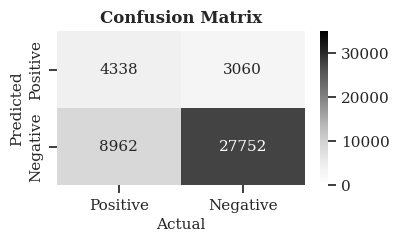

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

font_title = {"family" : "serif",
              #"color" : "darkblue",
              "weight" : "bold",
              "size" : 12}

font_text = {"family" : "serif",
             #"color" : "black",
             "weight" : "normal",
             "size" : 11}

font_annot = {"family" : "serif",
              #"color" : "black",
              "weight" : "normal",
              "size" : 8}

sns.set(font = "serif", 
        font_scale = 1.0, 
        style = "ticks")

data = {'Positive': [conf_matrix['TP'], conf_matrix['FN']],
        'Negative': [conf_matrix['FP'], conf_matrix['TN']]}
conf_df = pd.DataFrame(data, index=['Positive', 'Negative'])

plt.figure(figsize = (4,2))
# s = sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g', annot_kws = font_text)
s = sns.heatmap(conf_df, annot=True, cmap="Greys", antialiased=True, fmt='g', annot_kws = font_text, vmax = 35000, vmin = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 90, **font_text)
s.set_xticklabels(s.get_xticklabels(), rotation = 0, **font_text)
plt.xlabel('Actual', **font_text)
plt.ylabel('Predicted', **font_text)
plt.title("Confusion Matrix", **font_title)
plt.savefig("confusion_matrix.pdf", format="pdf", bbox_inches="tight")
plt.show()

